### Student Details

### Student Name: Aidan Keeshan
### Student ID: 18200117

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
def plot_bound(X_train,y_train,clf,title):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

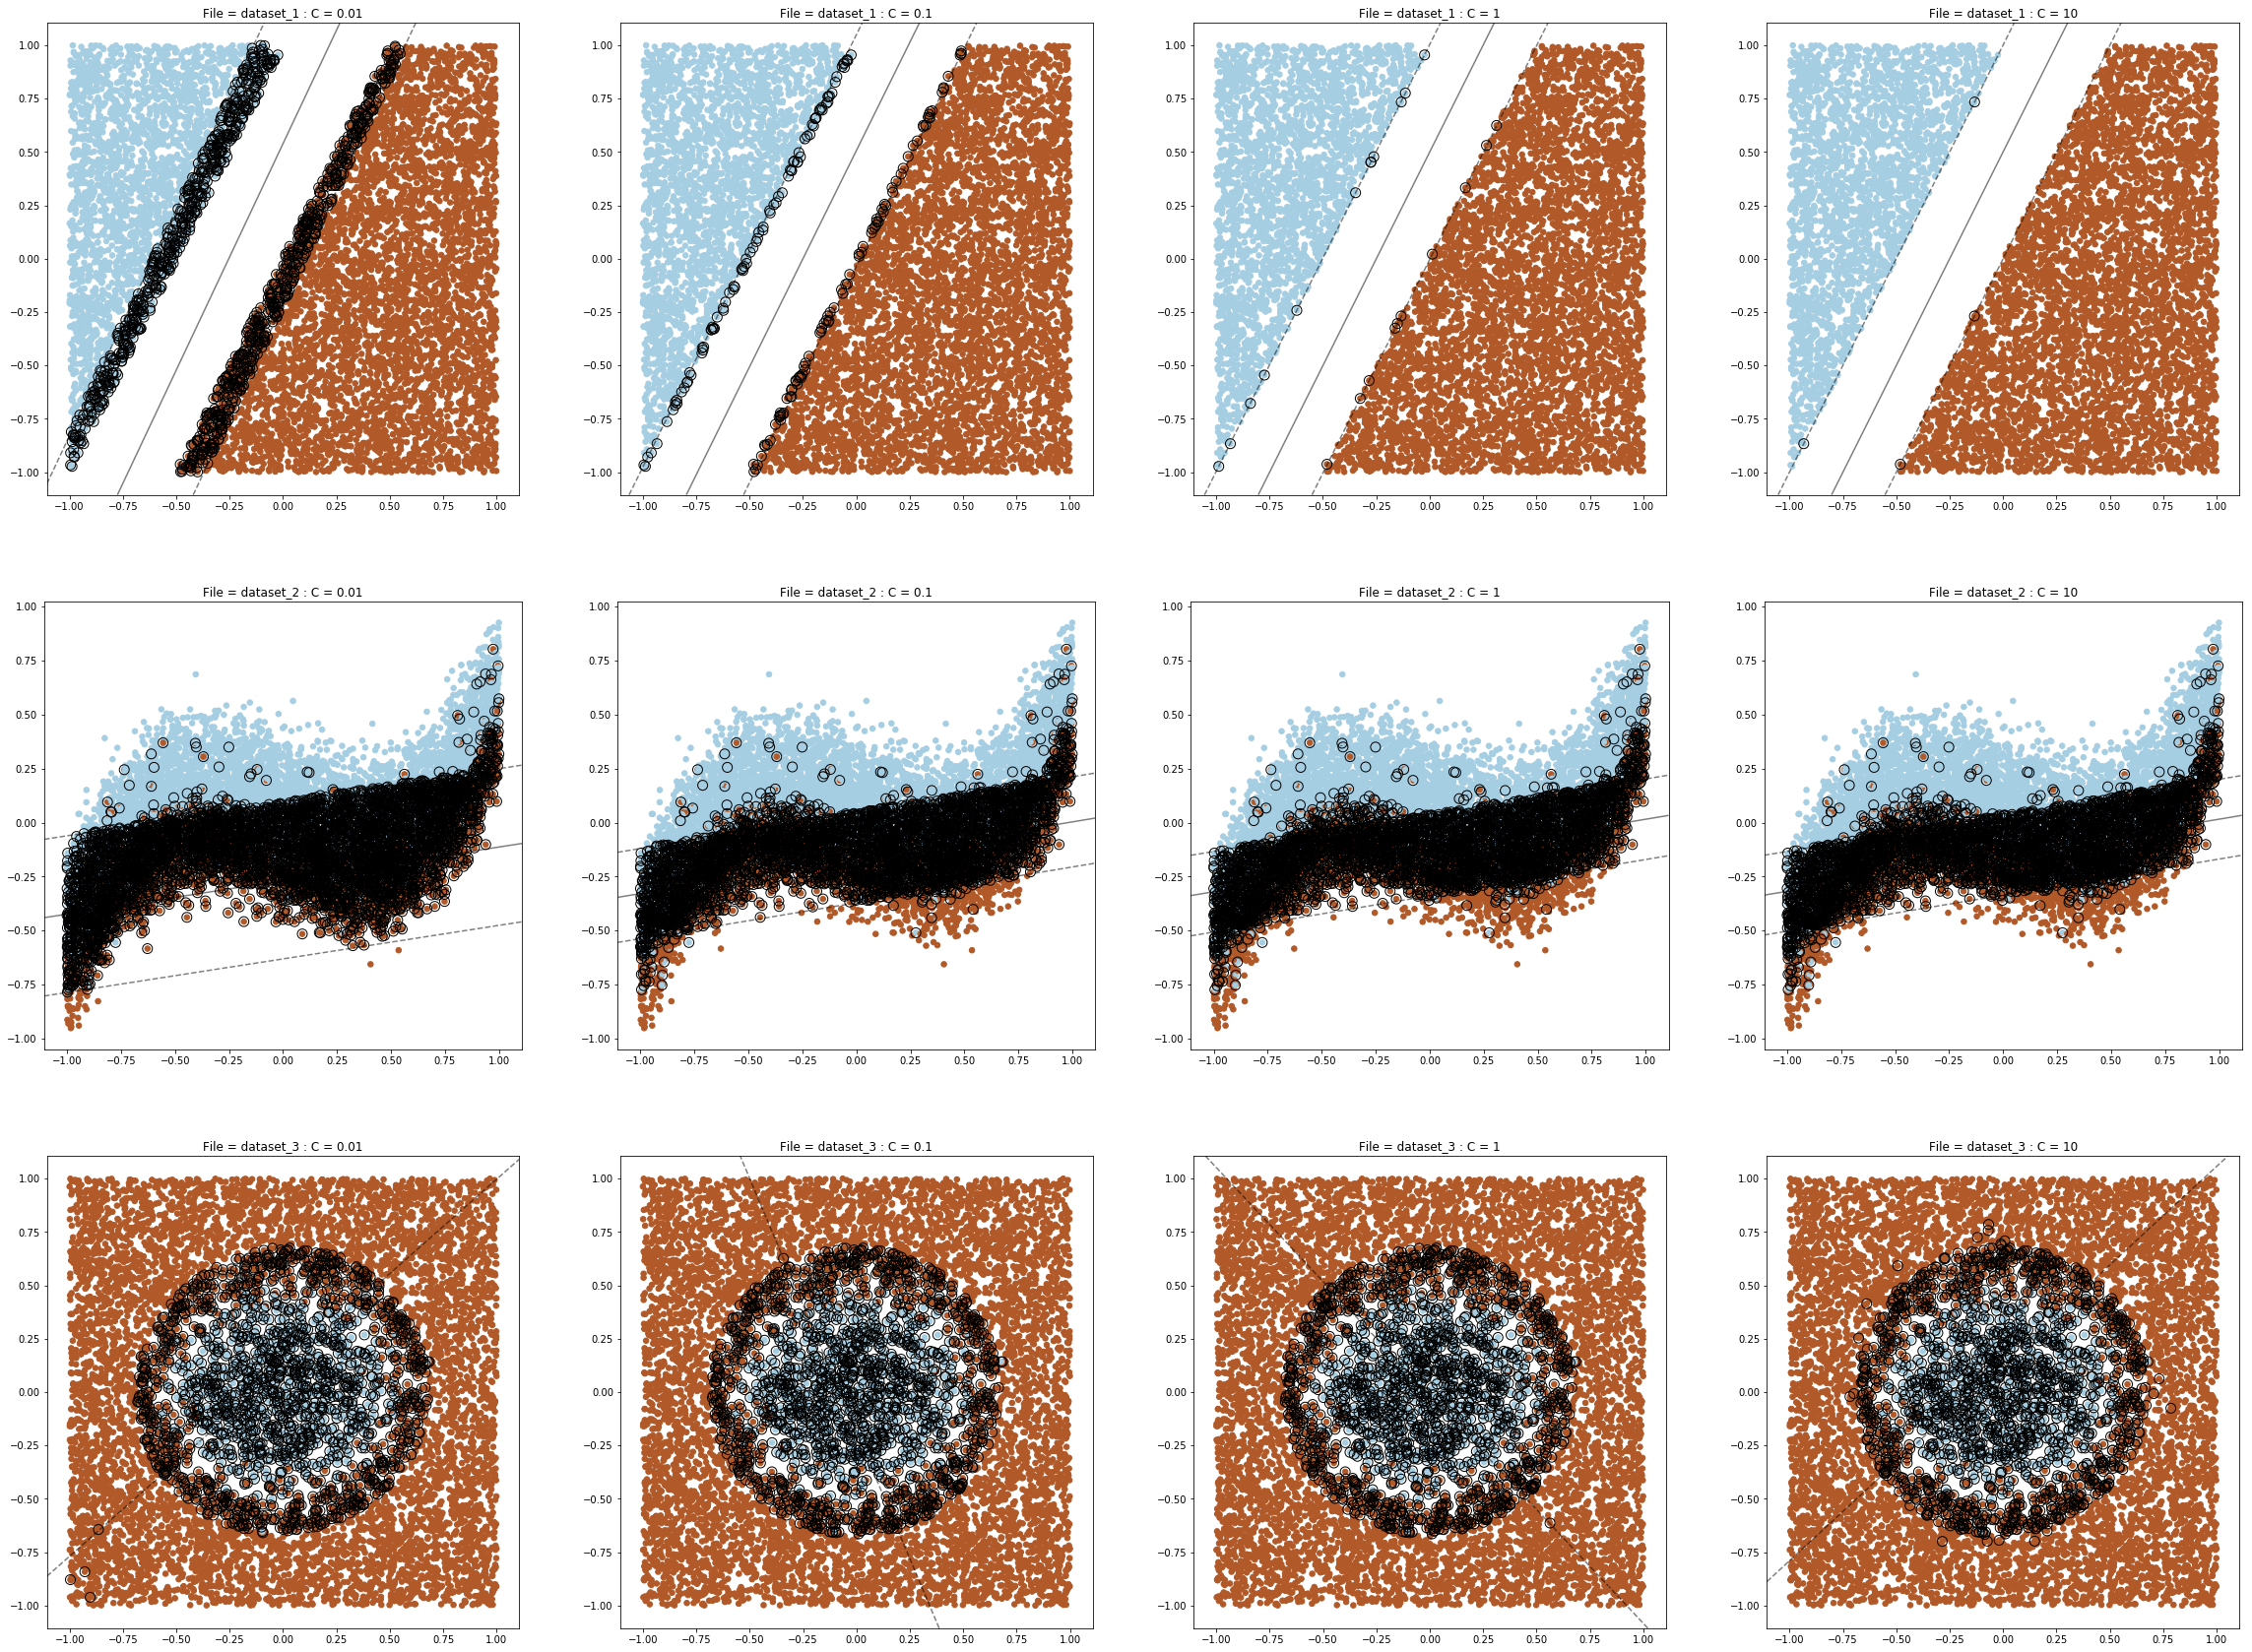

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

def import_csv(src_csv):
    ds = np.genfromtxt(src_csv, delimiter=',',skip_header=1,dtype=[('index','u4'),('VAR1','f8'),('VAR2','f8'),('TARGET','u1')])
    return train_test_split(np.c_[ds['VAR1'],ds['VAR2']], ds['TARGET'], test_size=0.2, random_state=0)

data = {}

for csv_n in [1,2,3]:
    key = 'dataset_'+str(csv_n)
    data[key] = import_csv(key+'.csv')

i = 1
f = plt.figure(figsize=(40,30))

for key in data:
    for c in [0.01,0.1,1,10]:
        GS = GridSearchCV(svm.SVC(), {'kernel':['linear'],'C': [c]},cv=3,n_jobs=-1)
        clf = GS.fit(data[key][0],data[key][2])
        ax = f.add_subplot(3,4,i)
        plot_bound(data[key][0],data[key][2],clf,'File = {} : C = {}'.format(key,c))
        i += 1